<a href="https://colab.research.google.com/github/divyu135/NLP-Machine-Learning-Intro/blob/master/Interactive_K_NN_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown <center><h3> Import Libraries </h3></center><br>

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

def knn_comparison(data, plot_w, plot_h, n_neighbors = 15, grid_w=0.2):
    x = data[:,0:2]
    y = data[:,2]
    
    #creating grid
    grid_width = grid_w
    color_map_light = ListedColormap(['#FFAAAA','#AAAAFF']) 
    color_map_bold = ListedColormap(['#FF0000','#0000FF'])
    
    classifier = KNeighborsClassifier(n_neighbors)
    classifier.fit(x,y)
    
    min_x, max_x = x[:,0].min()-1, x[:,0].max() + 1
    min_y, max_y = x[:,1].min()-1, x[:,1].max() + 1
    
    xx , yy = np.meshgrid(np.arange(min_x, max_x, grid_width), np.arange(min_y,max_y,grid_width))
    z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    
    z =z.reshape(xx.shape)
    
    plt.figure( figsize=(plot_w, plot_h), dpi=80 )
    plt.pcolormesh(xx,yy,z,cmap=color_map_light)
    
    plt.scatter(x[:,0],x[:,1],c=y,cmap=color_map_bold)
    
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.title('K value: '+str(n_neighbors))
    plt.show()

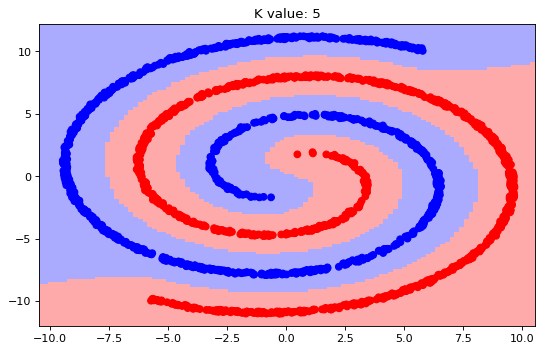

In [ ]:
#@title <center>Plotting K-NN Classification of different dummy dataset.</center>

#@markdown Select any dataset from the dropdown
dataset = "8.twospirals.csv" #@param ["1.ushape.csv", "2.concerticcir1.csv", "3.concertriccir2.csv","4.linearsep.csv","5.outlier.csv","6.overlap.csv","7.xor.csv","8.twospirals.csv","9.random.csv"]
demo_data = "/content/github/demo_data/"
data = np.genfromtxt( demo_data+dataset,delimiter=',')

#@markdown Number of Nearest Neighbours 
nearest_n =  5#@param {type:"integer"}


#@markdown <center> Plotting Varaibles </center>

#@markdown Plot Width 
plot_width = 8 #@param {type:"slider", min:2, max:16, step:0.5}

#@markdown Plot Height
plot_height = 5 #@param {type:"slider", min:2, max:10, step:0.5}

#@markdown Grid width
grid_width = 0.2 #@param {type:"slider", min:0.1, max:1, step:0.1}

knn_comparison(data, plot_width, plot_height, nearest_n, grid_width)